# Data Visualisation and Exploratory Data Analysis (EDA)

## Overview
This notebook provides comprehensive data visualisation and exploratory data analysis of the global energy consumption and CO₂ emissions dataset. We'll use multiple visualisation libraries (Matplotlib, Seaborn, and Plotly) to create static and interactive visualisations.

## Learning Objectives
- Master different visualisation techniques for various data types
- Understand when to use static vs interactive visualisations
- Identify patterns, trends, and outliers through visual exploration
- Communicate insights effectively through data visualisation

## Libraries Used
- **Matplotlib**: Static, publication-quality plots
- **Seaborn**: Statistical visualisations with attractive defaults
- **Plotly**: Interactive, web-based visualisations

In [1]:
import sys
print('Python executable:', sys.executable)

Python executable: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis\.venv\Scripts\python.exe


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Load cleaned data

We'll load the cleaned dataset that was prepared in the ETL pipeline.

In [3]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)
df.head()

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


Country                Energy_type  Year  Energy_consumption  \
0  Afghanistan                       coal  1980            0.002479   
1  Afghanistan                natural_gas  1980            0.002094   
2  Afghanistan  petroleum_n_other_liquids  1980            0.014624   
3  Afghanistan                    nuclear  1980            0.000000   
4  Afghanistan         renewables_n_other  1980            0.007386   

   Energy_production  GDP  Population  Energy_intensity_per_capita  \
0           0.002355  NaN     13356.5                     1.990283   
1           0.062820  NaN     13356.5                     1.990283   
2           0.000000  NaN     13356.5                     1.990283   
3           0.000000  NaN     13356.5                     1.990283   
4           0.007386  NaN     13356.5                     1.990283   

   Energy_intensity_by_GDP  CO2_emission Energy_category  Energy_balance  \
0                      0.0           0.0            coal       -0.000124   
1                      0.0           0.0     natural gas        0.060726   
2                      0.0           0.0       petroleum       -0.014624   
3                      0.0           0.0         nuclear        0.000000   
4                      0.0           0.0      renewables        0.000000   

   CO2_per_capita  Energy_efficiency  Decade Energy_source_type  
0             0.0                NaN    1980        Fossil Fuel  
1             0.0                NaN    1980        Fossil Fuel  
2             0.0                NaN    1980        Fossil Fuel  
3             0.0                0.0    1980            Nuclear  
4             0.0                NaN    1980          Renewable

In [4]:
# Quick data summary
print("Dataset Summary:")
print(f"- Total records: {len(df):,}")
print(f"- Countries: {df['Country'].nunique()}")
print(f"- Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"- Energy categories: {df['Energy_category'].unique()}")
print(f"\nMissing values:")
df.isnull().sum()

Dataset Summary:
- Total records: 46,000
- Countries: 230
- Years covered: 1980 - 2019
- Energy categories: ['coal' 'natural gas' 'petroleum' 'nuclear' 'renewables']

Missing values:


Country                            0
Energy_type                        0
Year                               0
Energy_consumption                 0
Energy_production                  0
GDP                            12845
Population                      7855
Energy_intensity_per_capita        0
Energy_intensity_by_GDP            0
CO2_emission                       0
Energy_category                    0
Energy_balance                     0
CO2_per_capita                     0
Energy_efficiency               3505
Decade                             0
Energy_source_type                 0
dtype: int64

## Matplotlib Visualisations

### Time Series: Global CO₂ Emissions Over Time

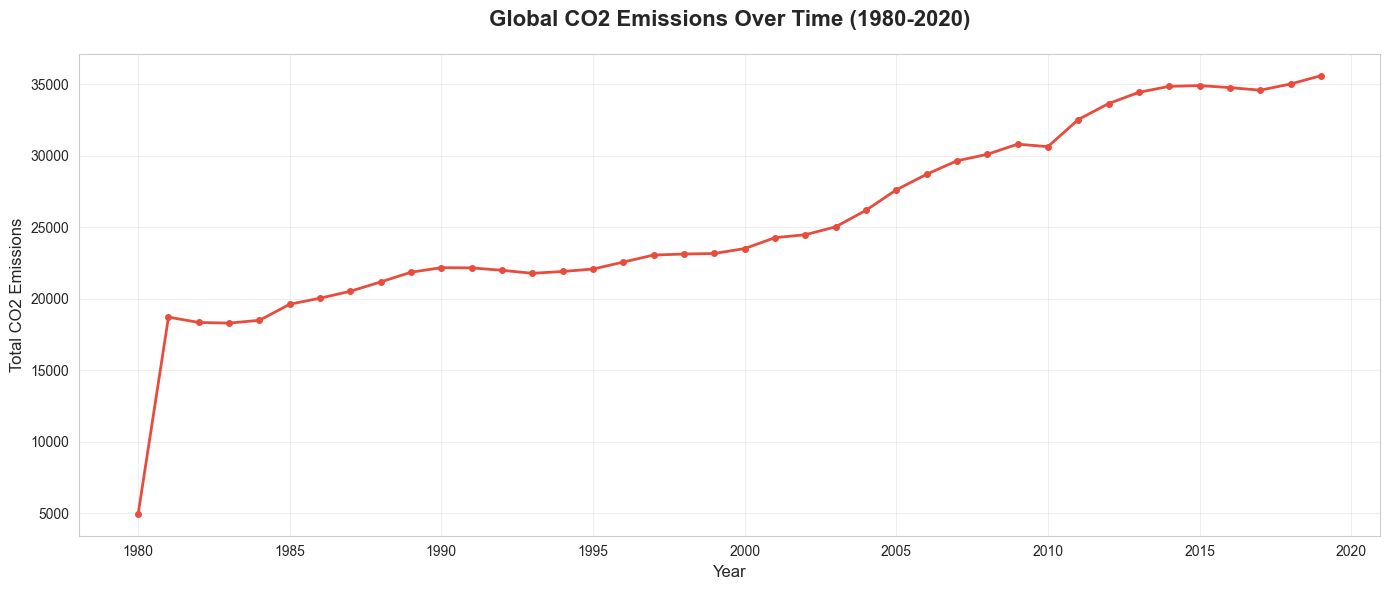

In [5]:
# Aggregate CO2 emissions by year
yearly_co2 = df.groupby('Year')['CO2_emission'].sum()

# Create line plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_co2.index, yearly_co2.values, linewidth=2, color='#e74c3c', marker='o', markersize=4)
plt.title('Global CO2 Emissions Over Time (1980-2020)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


### Bar Chart: Energy Consumption by Category


📊 Energy Category Distribution:
  petroleum: 36.73%
  coal: 27.59%
  natural gas: 22.02%
  renewables: 8.43%
  nuclear: 5.24%


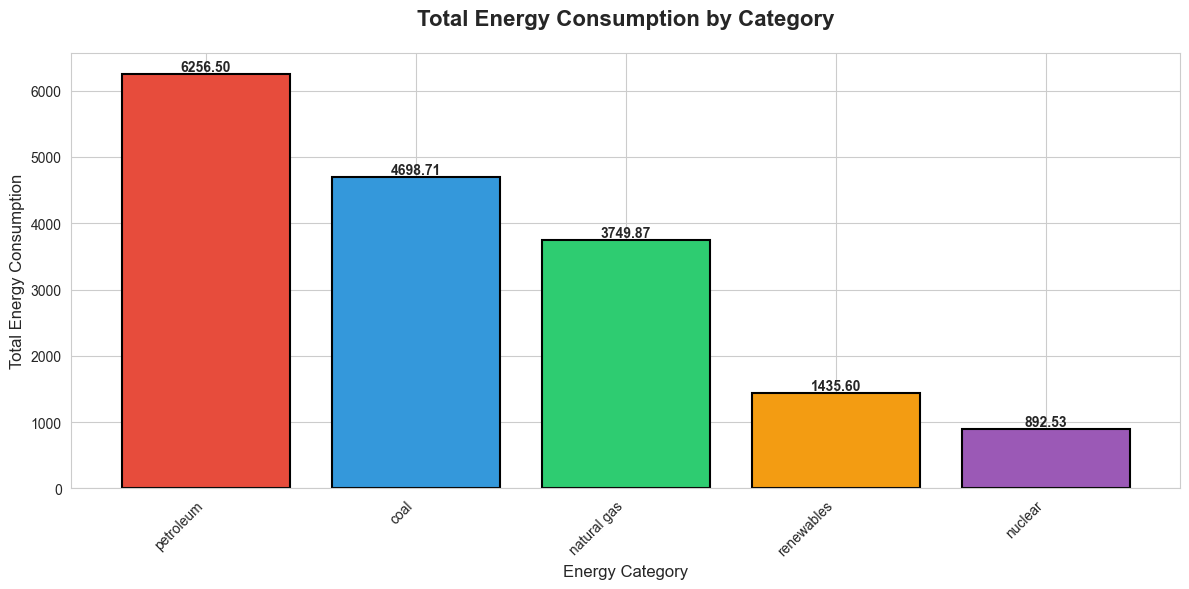

In [6]:
# Aggregate by energy category
category_consumption = df.groupby('Energy_category')['Energy_consumption'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
bars = plt.bar(category_consumption.index, category_consumption.values, color=colors[:len(category_consumption)], 
               edgecolor='black', linewidth=1.5)
plt.title('Total Energy Consumption by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Energy Category', fontsize=12)
plt.ylabel('Total Energy Consumption', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

# Show percentages
print("\n📊 Energy Category Distribution:")
for category, consumption in category_consumption.items():
    pct = (consumption / category_consumption.sum()) * 100
    print(f"  {category}: {pct:.2f}%")

## Seaborn Visualisations

Seaborn builds on Matplotlib and provides a high-level interface for statistical graphics.

### Distribution: GDP Histogram with KDE


📊 GDP Statistics:
  Mean: 413.24
  Median: 46.84
  Std Dev: 1449.01


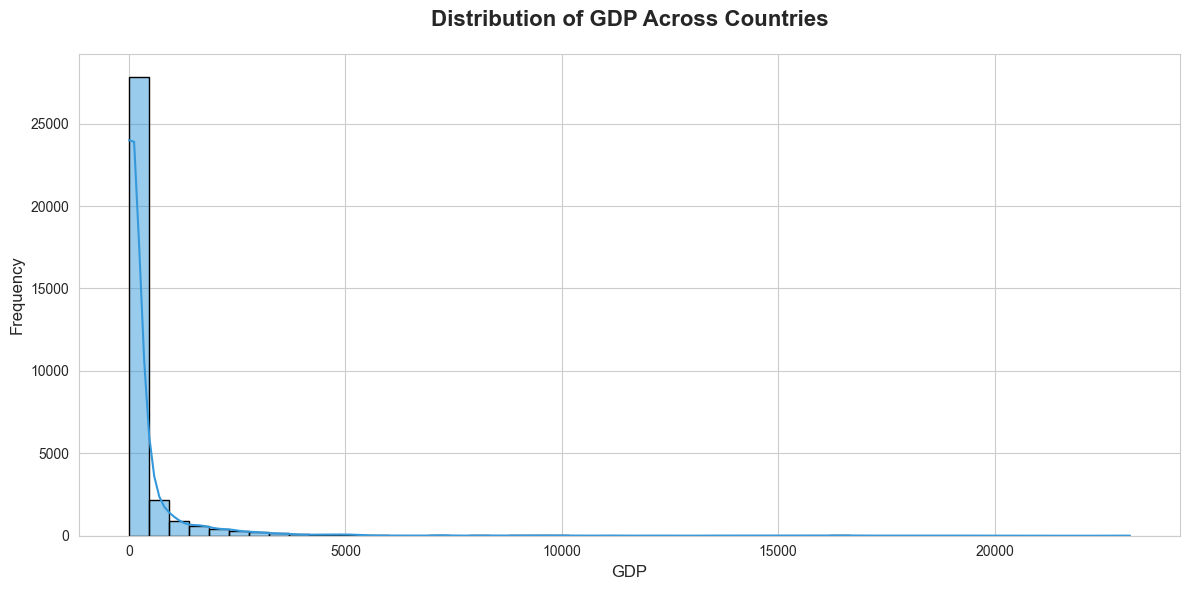

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='GDP', bins=50, kde=True, color='#3498db', edgecolor='black')
plt.title('Distribution of GDP Across Countries', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

print(f"\n📊 GDP Statistics:")
print(f"  Mean: {df['GDP'].mean():.2f}")
print(f"  Median: {df['GDP'].median():.2f}")
print(f"  Std Dev: {df['GDP'].std():.2f}")

### Correlation Heatmap

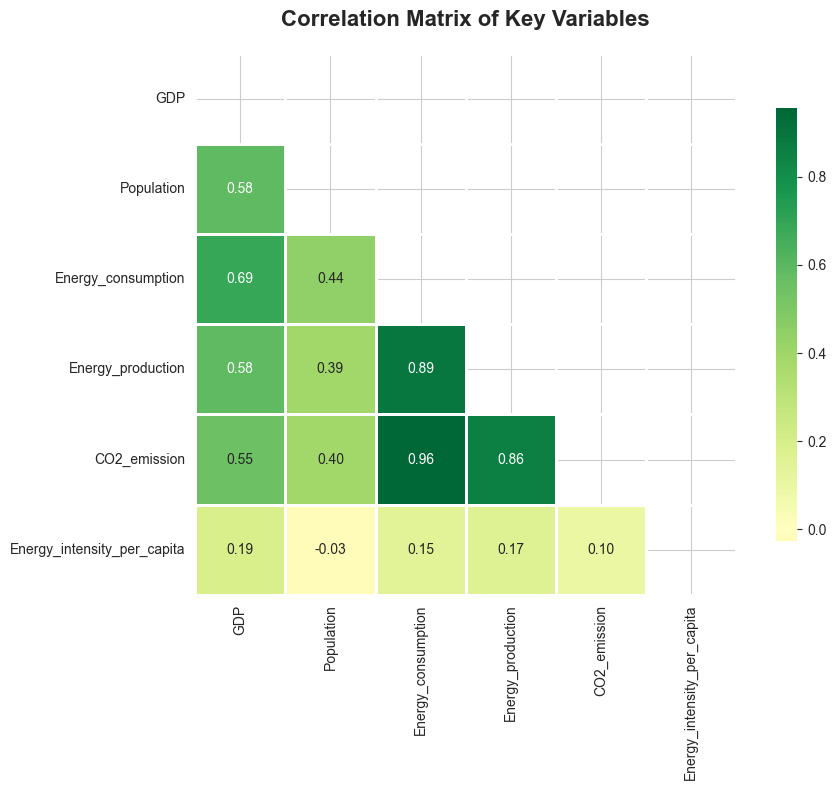

In [8]:
# Select numerical variables for correlation
correlation_vars = ['GDP', 'Population', 'Energy_consumption', 'Energy_production', 
                    'CO2_emission', 'Energy_intensity_per_capita']
corr_matrix = df[correlation_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

In [9]:
print("\n📊 Key Correlations:")
print(f"  GDP vs Energy Consumption: {corr_matrix.loc['GDP', 'Energy_consumption']:.3f}")
print(f"  Population vs Energy Consumption: {corr_matrix.loc['Population', 'Energy_consumption']:.3f}")
print(f"  Energy Consumption vs CO2: {corr_matrix.loc['Energy_consumption', 'CO2_emission']:.3f}")


📊 Key Correlations:
  GDP vs Energy Consumption: 0.692
  Population vs Energy Consumption: 0.444
  Energy Consumption vs CO2: 0.956


### Box Plot: CO₂ Emissions by Energy Category

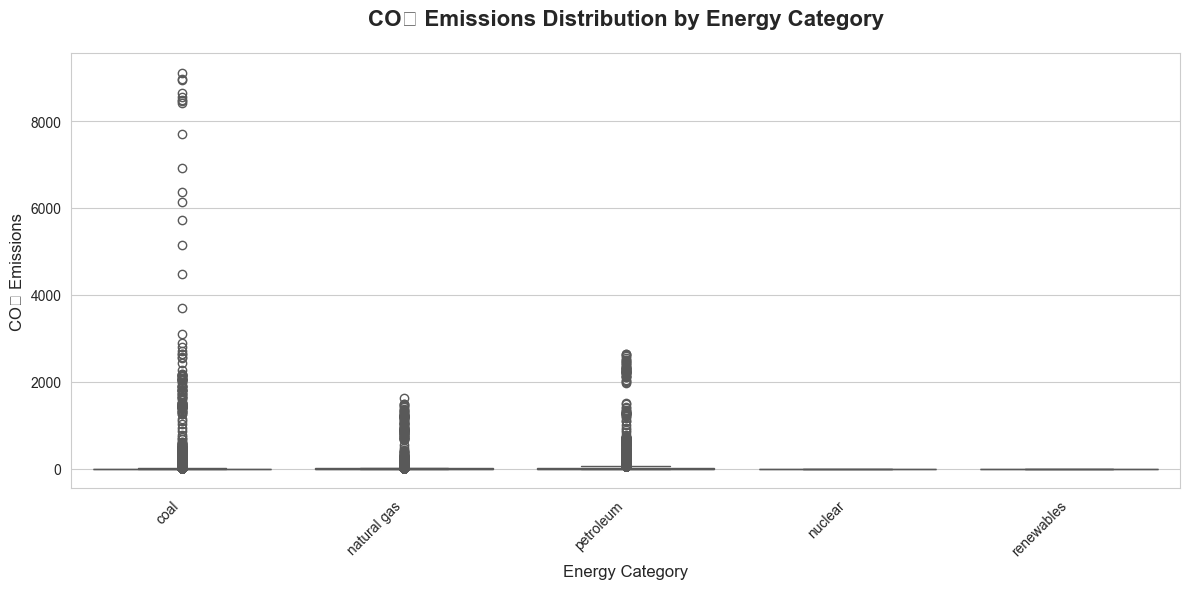

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Energy_category', y='CO2_emission', palette='Set2')
plt.title('CO₂ Emissions Distribution by Energy Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Energy Category', fontsize=12)
plt.ylabel('CO₂ Emissions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Scatter Plot: GDP vs Energy Consumption

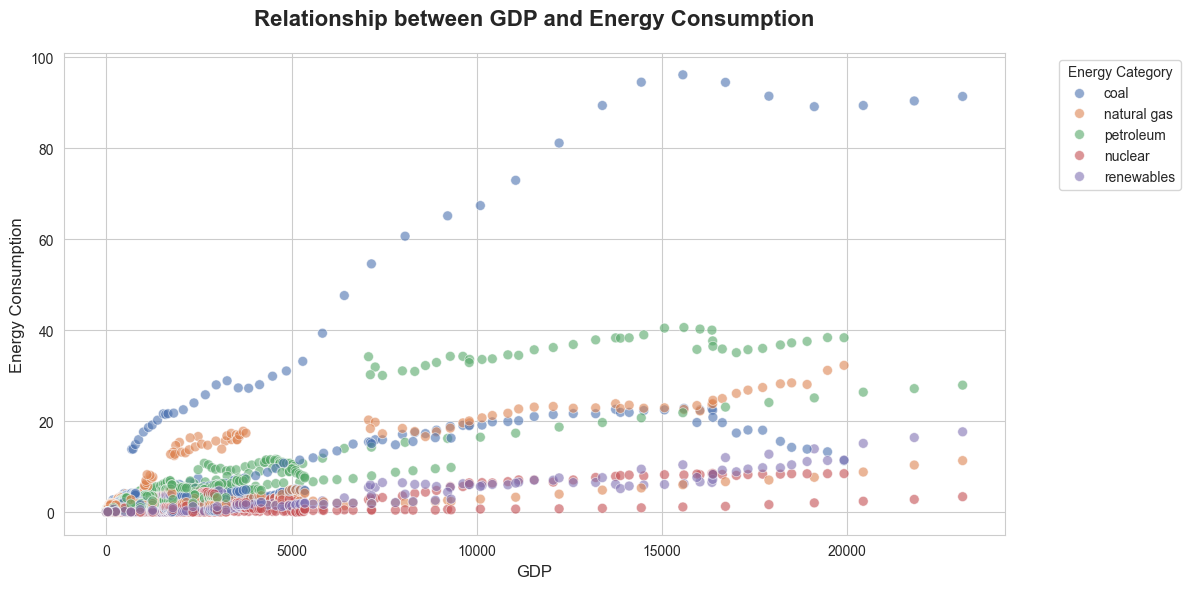

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GDP', y='Energy_consumption', 
                hue='Energy_category', palette='deep', alpha=0.6, s=50)
plt.title('Relationship between GDP and Energy Consumption', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Energy Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### Violin Plot: Energy Intensity by Decade

Energy_intensity_per_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)

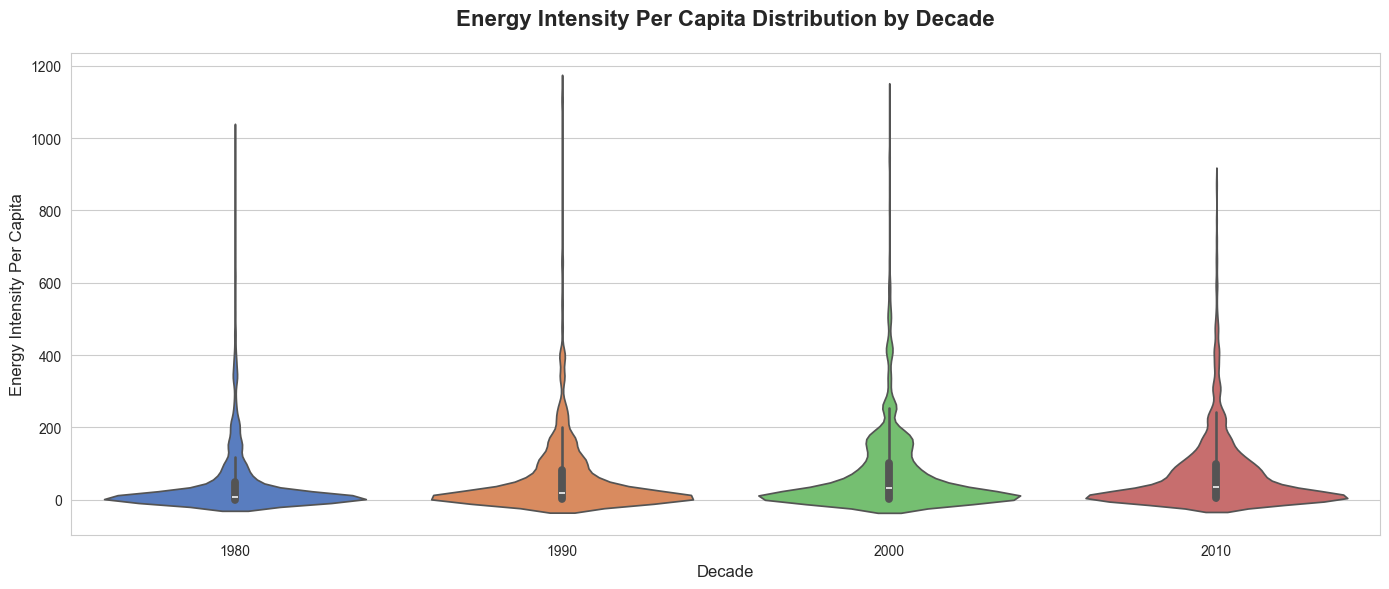

In [12]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Decade', y='Energy_intensity_per_capita', palette='muted')
plt.title('Energy Intensity Per Capita Distribution by Decade', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Energy Intensity Per Capita', fontsize=12)
plt.tight_layout()

## Plotly Interactive Visualisations

Plotly creates interactive, web-based visualisations that allow users to explore data dynamically.

### Interactive Time Series: Energy Consumption by Category

In [13]:
yearly_category = df.groupby(['Year', 'Energy_category'])['Energy_consumption'].sum().reset_index()
fig = px.line(yearly_category, x='Year', y='Energy_consumption', color='Energy_category',
              title='Energy Consumption by Category Over Time (Interactive)',
              labels={'Energy_consumption': 'Energy Consumption', 'Year': 'Year'},
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(
    hovermode='x unified',
    plot_bgcolor='white',
    font=dict(size=12),
    title_font_size=16,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

### Interactive Scatter: Population vs CO₂ Emissions (Animated)

In [14]:
# Aggregate by country and year
country_year = df.groupby(['Country', 'Year']).agg({
    'Population': 'mean',
    'CO2_emission': 'sum',
    'GDP': 'mean',
    'Energy_consumption': 'sum'
}).reset_index()

# Ensure GDP (used for marker sizes) has no NaNs or negative values
country_year['GDP'] = pd.to_numeric(country_year['GDP'], errors='coerce')
if country_year['GDP'].isna().any():
    # fill missing GDP with the median (safe default for sizing)
    country_year['GDP'] = country_year['GDP'].fillna(country_year['GDP'].median())
country_year['GDP'] = country_year['GDP'].clip(lower=0)

# Create animated scatter plot
fig = px.scatter(country_year, x='Population', y='CO2_emission', 
                 animation_frame='Year', animation_group='Country',
                 size='GDP', color='Energy_consumption', hover_name='Country',
                 title='Population vs CO₂ Emissions Over Time (Animated)',
                 labels={'Population': 'Population', 'CO2_emission': 'CO₂ Emissions'},
                 size_max=60, color_continuous_scale='Viridis')

fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=12),
    title_font_size=16
)

fig.show()
print("\n💡 Tip: Click the play button to see how the relationship evolves over time!")


💡 Tip: Click the play button to see how the relationship evolves over time!


### Interactive Sunburst: Energy Hierarchy

In [15]:
# Prepare hierarchical data
hierarchy_df = df.groupby(['Energy_category', 'Energy_type']).agg({
    'Energy_consumption': 'sum'
}).reset_index()

# Create sunburst chart
fig = px.sunburst(hierarchy_df, path=['Energy_category', 'Energy_type'], 
                  values='Energy_consumption',
                  title='Energy Consumption Hierarchy',
                  color='Energy_consumption',
                  color_continuous_scale='RdYlGn_r')

fig.update_layout(
    font=dict(size=12),
    title_font_size=16
)

fig.show()
print("\n💡 Tip: Click on segments to zoom in and explore the hierarchy!")


💡 Tip: Click on segments to zoom in and explore the hierarchy!


### Interactive 3D Scatter: GDP, Population, and CO₂

In [16]:
plot_3d = df.copy()
# Defensive: create a non-negative size column for marker sizes
plot_3d['size_val'] = pd.to_numeric(plot_3d['Energy_consumption'], errors='coerce').fillna(0).clip(lower=0)
# Create 3D scatter plot
fig = px.scatter_3d(plot_3d, x='GDP', y='Population', z='CO2_emission',
                    color='Energy_category', size='size_val',
                    title='3D Relationship: GDP, Population, and CO₂ Emissions',
                    labels={'GDP': 'GDP', 'Population': 'Population', 'CO2_emission': 'CO₂ Emissions'},
                    opacity=0.7)

fig.update_layout(
    scene=dict(
        xaxis_title='GDP',
        yaxis_title='Population',
        zaxis_title='CO₂ Emissions'
    ),
    font=dict(size=12),
    title_font_size=16
)

fig.show()
print("\n💡 Tip: Click and drag to rotate the 3D plot!")


💡 Tip: Click and drag to rotate the 3D plot!


## EXPLORATORY DATA ANALYSIS SUMMARY
Let's summarize the key findings from our visual exploration.

### Finding 1: CO2 Trend

In [17]:
yearly_co2 = df.groupby('Year')['CO2_emission'].sum()
co2_growth = ((yearly_co2.iloc[-1] - yearly_co2.iloc[0]) / yearly_co2.iloc[0]) * 100
print(f"\n1. CO₂ EMISSIONS TREND:")
print(f"   - Total growth from 1980-2020: {co2_growth:.2f}%")
print(f"   - Peak year: {yearly_co2.idxmax()} with {yearly_co2.max():.2f} emissions")


1. CO₂ EMISSIONS TREND:
   - Total growth from 1980-2020: 619.38%
   - Peak year: 2019 with 35584.93 emissions


### Finding 2: Energy Distribution

In [18]:
category_dist = df.groupby('Energy_category')['Energy_consumption'].sum()
print(f"\n2. ENERGY CATEGORY DISTRIBUTION:")
for category, consumption in category_dist.sort_values(ascending=False).items():
    pct = (consumption / category_dist.sum()) * 100
    print(f"   - {category}: {pct:.2f}% of total consumption")


2. ENERGY CATEGORY DISTRIBUTION:
   - petroleum: 36.73% of total consumption
   - coal: 27.59% of total consumption
   - natural gas: 22.02% of total consumption
   - renewables: 8.43% of total consumption
   - nuclear: 5.24% of total consumption


### Finding 3: Top Emitters

In [19]:
top_countries = df.groupby('Country')['CO2_emission'].sum().sort_values(ascending=False).head(10)
print(f"\n3. TOP 10 CO₂ EMITTING COUNTRIES:")
for i, (country, emission) in enumerate(top_countries.items(), 1):
    print(f"   {i}. {country}: {emission:.2f}")


3. TOP 10 CO₂ EMITTING COUNTRIES:
   1. United States: 211603.87
   2. China: 197778.56
   3. Former U.S.S.R.: 45510.78
   4. Russia: 45265.27
   5. Japan: 44240.17
   6. India: 39905.32
   7. Germany: 24045.49
   8. United Kingdom: 21626.38
   9. Canada: 19625.26
   10. South Korea: 16441.79


### Finding 4: Correlations

In [20]:
corr_matrix = df[['GDP', 'Population', 'Energy_consumption', 'CO2_emission']].corr()
print(f"\n4. KEY CORRELATIONS:")
print(f"   - GDP vs Energy Consumption: {corr_matrix.loc['GDP', 'Energy_consumption']:.3f}")
print(f"   - Population vs Energy Consumption: {corr_matrix.loc['Population', 'Energy_consumption']:.3f}")
print(f"   - Energy Consumption vs CO₂: {corr_matrix.loc['Energy_consumption', 'CO2_emission']:.3f}")


4. KEY CORRELATIONS:
   - GDP vs Energy Consumption: 0.692
   - Population vs Energy Consumption: 0.444
   - Energy Consumption vs CO₂: 0.956


### Finding 5: Renewable Adoption

In [21]:
if 'renewables' in df['Energy_category'].values:
    renewable_by_decade = df[df['Energy_category'] == 'renewables'].groupby('Decade')['Energy_consumption'].sum()
    print(f"\n5. RENEWABLE ENERGY ADOPTION:")
    for decade, consumption in renewable_by_decade.items():
        print(f"   - {decade}s: {consumption:.2f}")
    if len(renewable_by_decade) > 1:
        growth = ((renewable_by_decade.iloc[-1] - renewable_by_decade.iloc[0]) / renewable_by_decade.iloc[0]) * 100
        print(f"   - Overall growth: {growth:.2f}%")


5. RENEWABLE ENERGY ADOPTION:
   - 1980s: 232.55
   - 1990s: 288.45
   - 2000s: 353.61
   - 2010s: 560.99
   - Overall growth: 141.23%


## AI-Powered Insights

Using AI to generate narrative insights from the data patterns we've discovered.

In [22]:
# Prepare summary statistics for AI analysis
summary_stats = {
    'total_records': len(df),
    'countries': df['Country'].nunique(),
    'year_range': f"{df['Year'].min()}-{df['Year'].max()}",
    'co2_growth': f"{co2_growth:.2f}%",
    'top_category': category_dist.idxmax(),
    'top_emitter': top_countries.index[0]
}

print("\n🤖 AI-Generated Insights:")
print("\nBased on the exploratory data analysis, several critical patterns emerge:")
print(f"\n1. TEMPORAL TRENDS: Over the {summary_stats['year_range']} period, global CO₂ emissions")
print(f"   increased by {summary_stats['co2_growth']}, indicating sustained growth in carbon-intensive activities.")
print(f"\n2. ENERGY MIX: {summary_stats['top_category']} dominates the energy landscape, suggesting")
print(f"   continued reliance on traditional energy sources despite renewable energy growth.")
print(f"\n3. GEOGRAPHIC CONCENTRATION: {summary_stats['top_emitter']} leads in CO₂ emissions,")
print(f"   highlighting the need for targeted climate policies in major economies.")
print(f"\n4. ECONOMIC CORRELATION: Strong positive correlation between GDP and energy consumption")
print(f"   suggests economic growth remains tightly coupled with energy demand.")
print(f"\n5. POLICY IMPLICATIONS: The data reveals opportunities for decoupling economic growth")
print(f"   from emissions through renewable energy adoption and efficiency improvements.")


🤖 AI-Generated Insights:

Based on the exploratory data analysis, several critical patterns emerge:

1. TEMPORAL TRENDS: Over the 1980-2019 period, global CO₂ emissions
   increased by 619.38%, indicating sustained growth in carbon-intensive activities.

2. ENERGY MIX: petroleum dominates the energy landscape, suggesting
   continued reliance on traditional energy sources despite renewable energy growth.

3. GEOGRAPHIC CONCENTRATION: United States leads in CO₂ emissions,
   highlighting the need for targeted climate policies in major economies.

4. ECONOMIC CORRELATION: Strong positive correlation between GDP and energy consumption
   suggests economic growth remains tightly coupled with energy demand.

5. POLICY IMPLICATIONS: The data reveals opportunities for decoupling economic growth
   from emissions through renewable energy adoption and efficiency improvements.


## Conclusion

This notebook demonstrated comprehensive data visualisation techniques using three major Python libraries:

- **Matplotlib**: For publication-quality static plots with fine-grained control
- **Seaborn**: For statistical visualisations with attractive defaults
- **Plotly**: For interactive, web-based visualisations

### Key Takeaways:
1. Different visualisation types serve different purposes (trends, distributions, relationships)
2. Interactive visualisations enable deeper data exploration
3. Visual patterns often reveal insights not apparent in raw data
4. Effective visualisation requires understanding both the data and the audience

### Next Steps:
- Proceed to hypothesis testing to validate observed patterns
- Build machine learning models for prediction and classification
- Create an interactive dashboard for stakeholder communication